In [2]:
import pandas as pd
import numpy as np
from numpy.random import randint 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
%matplotlib inline

In [3]:
data = pd.read_csv("/content/Clean_Dataset.csv", delimiter=',', encoding = "utf-8")

In [4]:
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [6]:
data.describe(include = "object")

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
count,300153,300153,300153,300153,300153,300153,300153,300153
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,3235,61343,71146,250863,91538,59097,206666


In [7]:
data.describe(include = "float")

,duration
count,300153.000000
mean,12.221021
std,7.191997
min,0.830000
25%,6.830000
50%,11.250000
75%,16.170000
max,49.830000


In [8]:
data.shape

(300153, 12)

In [9]:
data.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

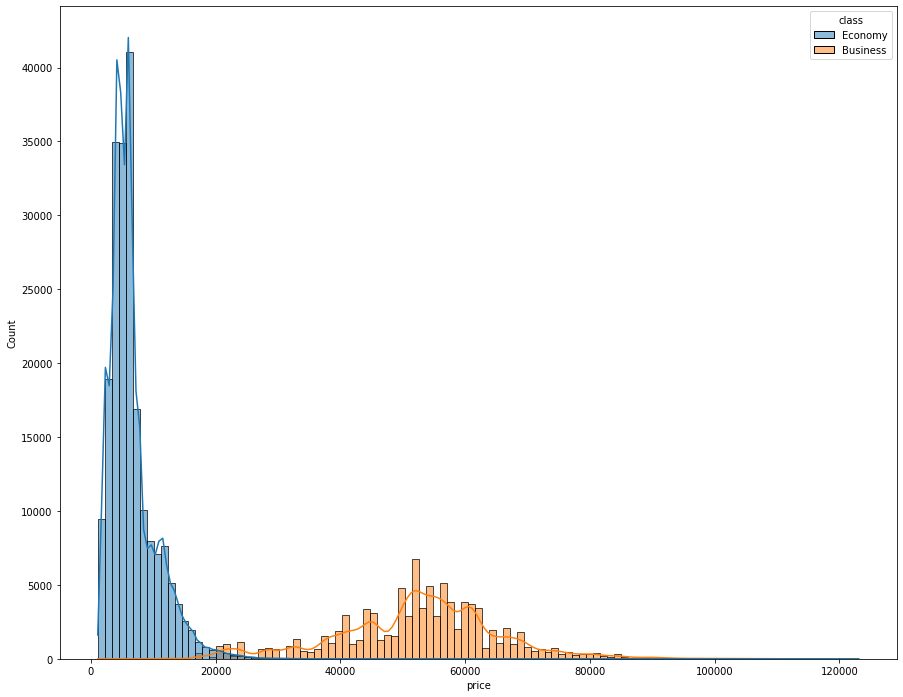

In [10]:
plt.figure(figsize=(15,12))
sns.histplot(data, x="price", kde=True,hue='class')

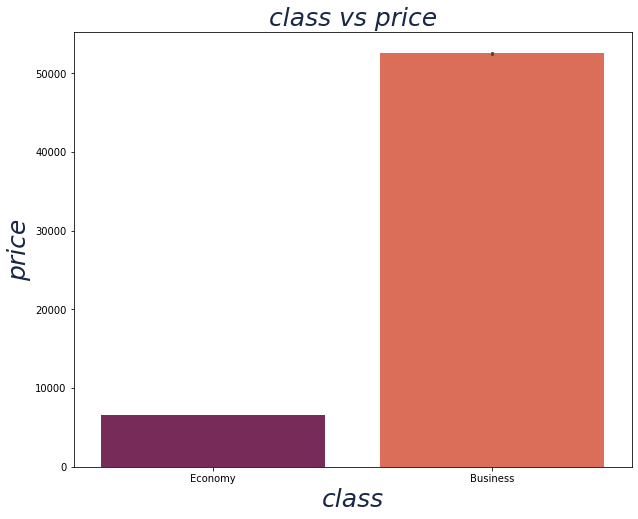

In [11]:
plt.figure(figsize=(10,8))
sns.barplot(x='class',data=data,y='price',palette='rocket')
plt.xlabel(fontsize=25,color='#182747',xlabel='class',fontstyle='italic')
plt.ylabel(fontsize=25,color='#182747',ylabel='price',fontstyle='italic')
plt.title(label='class vs price',fontsize=25,color='#182747',fontstyle='italic')
plt.rcParams["figure.figsize"] = (10,7)
plt.show()

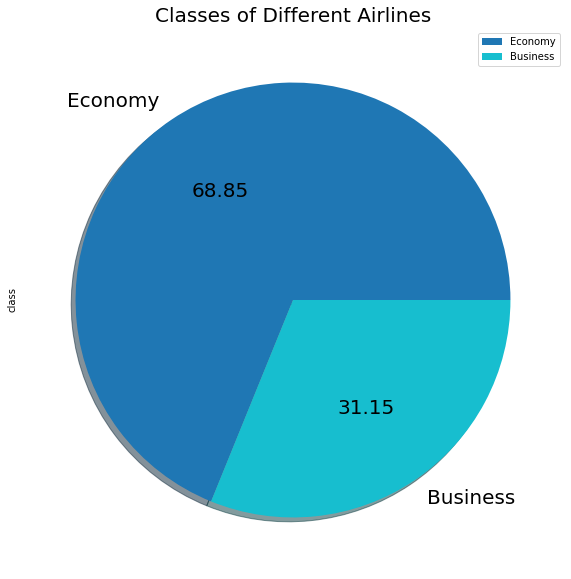

In [12]:
plt.figure(figsize=(12,10))
data['class'].value_counts().plot(kind='pie',textprops={'color':'black', 'fontsize': 20},autopct='%.2f',cmap='tab10', shadow=True)
plt.title('Classes of Different Airlines',fontsize=20)
plt.legend(['Economy','Business'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


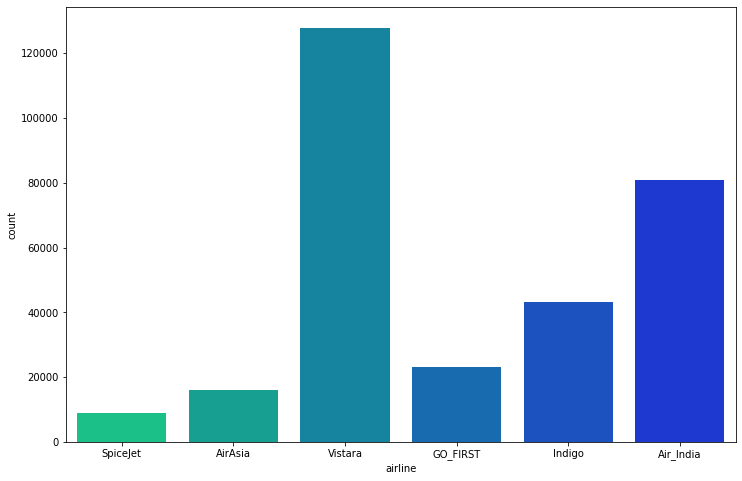

In [13]:
plt.figure(figsize=(12,8))
sns.countplot(data['airline'], palette='winter_r');

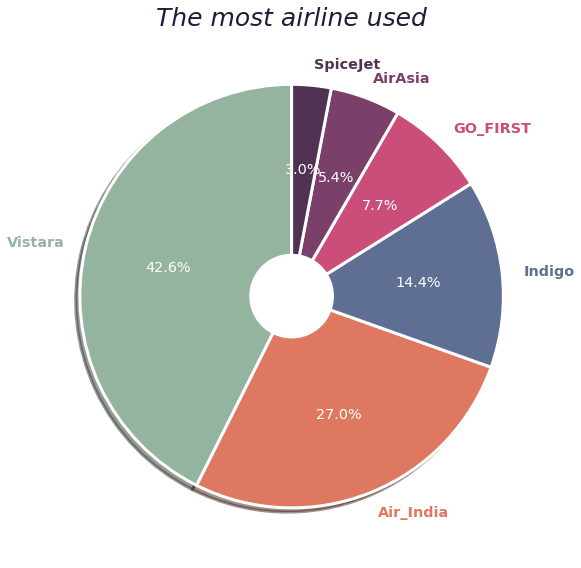

In [14]:
fig, ax = plt.subplots(figsize=(15, 8))
colors=['#94B49F','#DF7861','#5F6F94','#CA4E79','#7A4069','#513252']
colors2=['#A1C298','#C6EBC5','#FBF2C','#FFA7070','#DF7861','#F5C7A9']
patches, texts, pcts = ax.pie(
    data.airline.value_counts(), labels=[*data.airline.value_counts().index],shadow=True, autopct='%.1f%%',colors=colors,
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90)

for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
centre_circle = plt.Circle((0,0),0.20,fc='white') 
plt.gcf().gca().add_artist(centre_circle)
plt.tight_layout()
plt.title(label='The most airline used',fontsize=25,color='#251B37',fontstyle='italic')
plt.tight_layout()

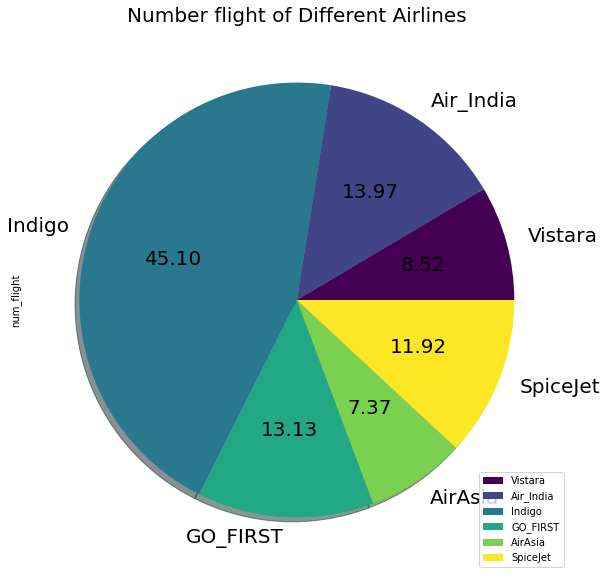

In [15]:
d={'num_flight':[133,218,704,205,115,186],'airline':['Vistara','Air_India','Indigo','GO_FIRST','AirAsia','SpiceJet']}
df=pd.DataFrame(data=d)
df=df.set_index('airline')
plt.figure(figsize=(12,10))
df['num_flight'].plot(kind='pie',textprops={'color':'black', 'fontsize': 20},autopct='%.2f',cmap='viridis', shadow=True)
plt.title('Number flight of Different Airlines',fontsize=20)
plt.legend(['Vistara','Air_India','Indigo','GO_FIRST','AirAsia','SpiceJet'])
plt.show()

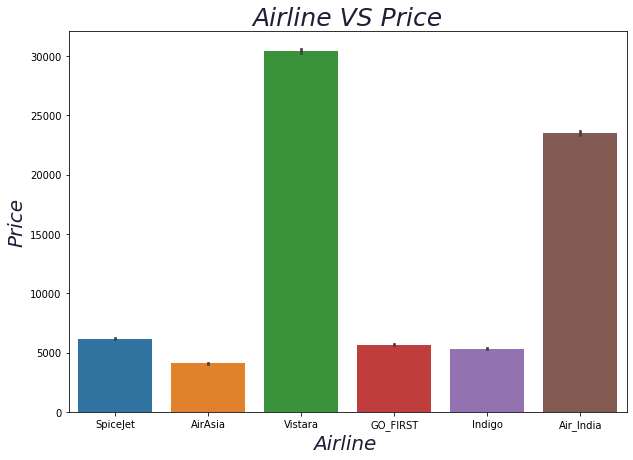

In [16]:
sns.barplot(data=data,x='airline',y='price')
plt.xlabel(fontsize=20,color='#251B37',xlabel='Airline ',fontstyle='italic')
plt.ylabel(fontsize=20,color='#251B37',ylabel='Price',fontstyle='italic')
plt.title(label='Airline VS Price',fontsize=25,color='#251B37',fontstyle='italic')
plt.rcParams["figure.figsize"] = (15,10)
plt.show()

Text(0.5, 1.0, 'Price With Airline')

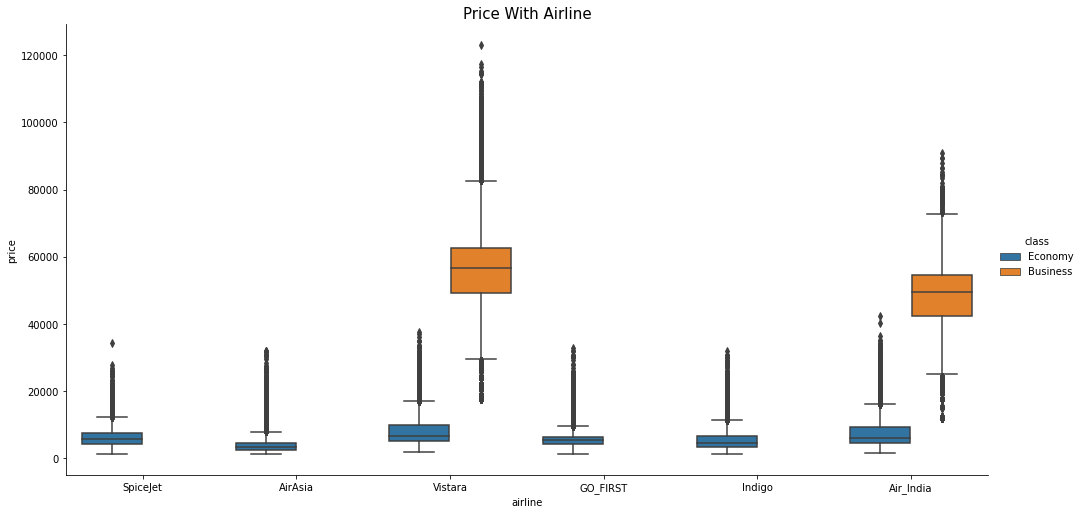

In [17]:
sns.catplot(kind='box',data=data,x='airline',y='price',hue="class",aspect=2,height=7)
plt.title('Price With Airline',fontsize=15)

<Figure size 1800x720 with 0 Axes>

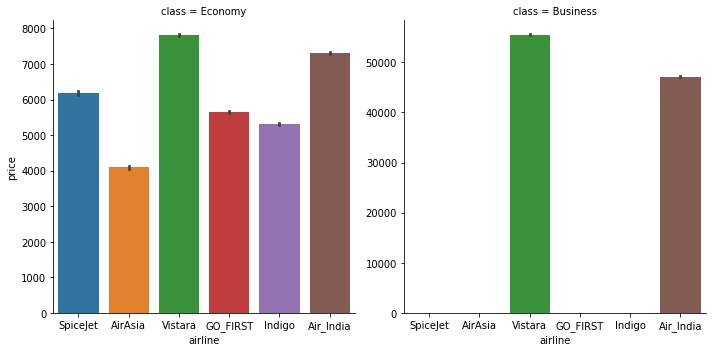

In [18]:
plt.figure(figsize=(25,10))    
sns.catplot(y='price', x='airline', data=data, kind='bar',col='class',sharey=False)
plt.show()

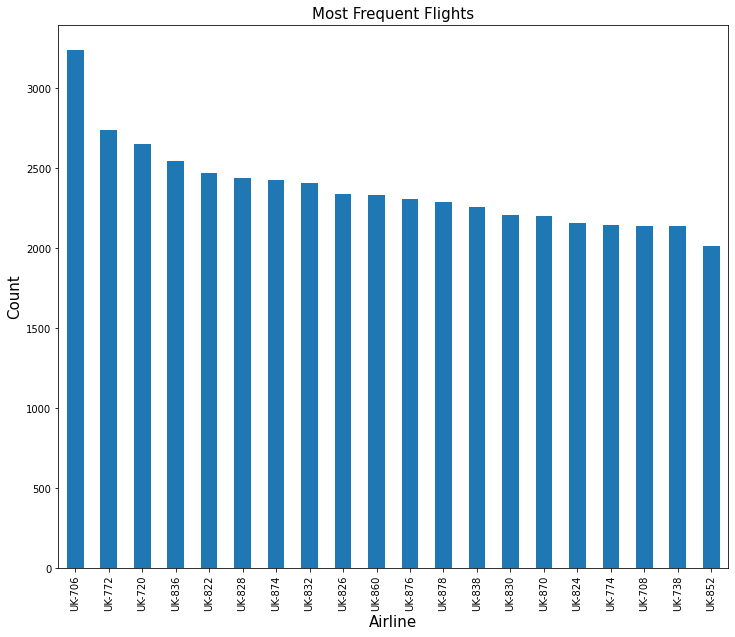

In [19]:
flights_Code = data.flight.value_counts().head(20).sort_values(ascending=False)
plt.figure(figsize=(12,10))
# sns.countplot(flights_Code,palette='hls')
flights_Code.plot(kind='bar')
plt.title('Most Frequent Flights',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


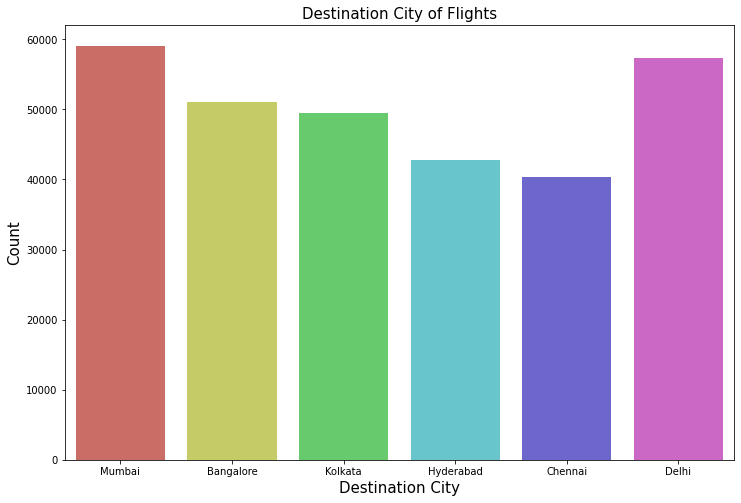

In [20]:
plt.figure(figsize=(12,8))
sns.countplot(data['destination_city'],palette='hls')
plt.title('Destination City of Flights',fontsize=15)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

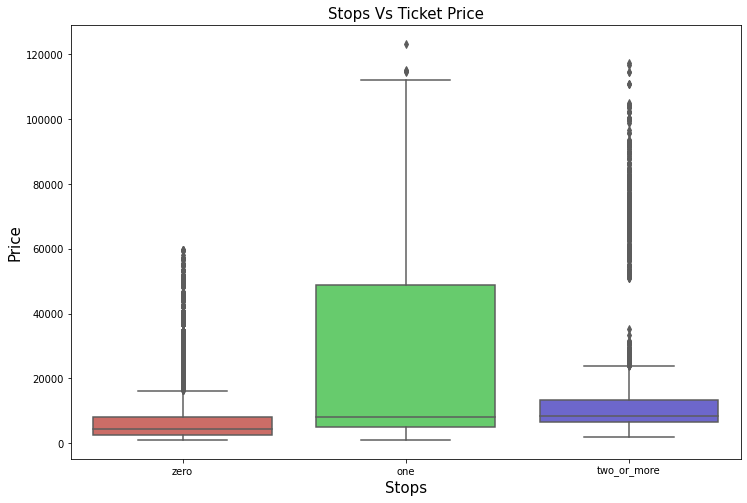

In [21]:
plt.figure(figsize=(12,8))
sns.boxplot(x='stops',y='price',data=data,palette='hls')
plt.title('Stops Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

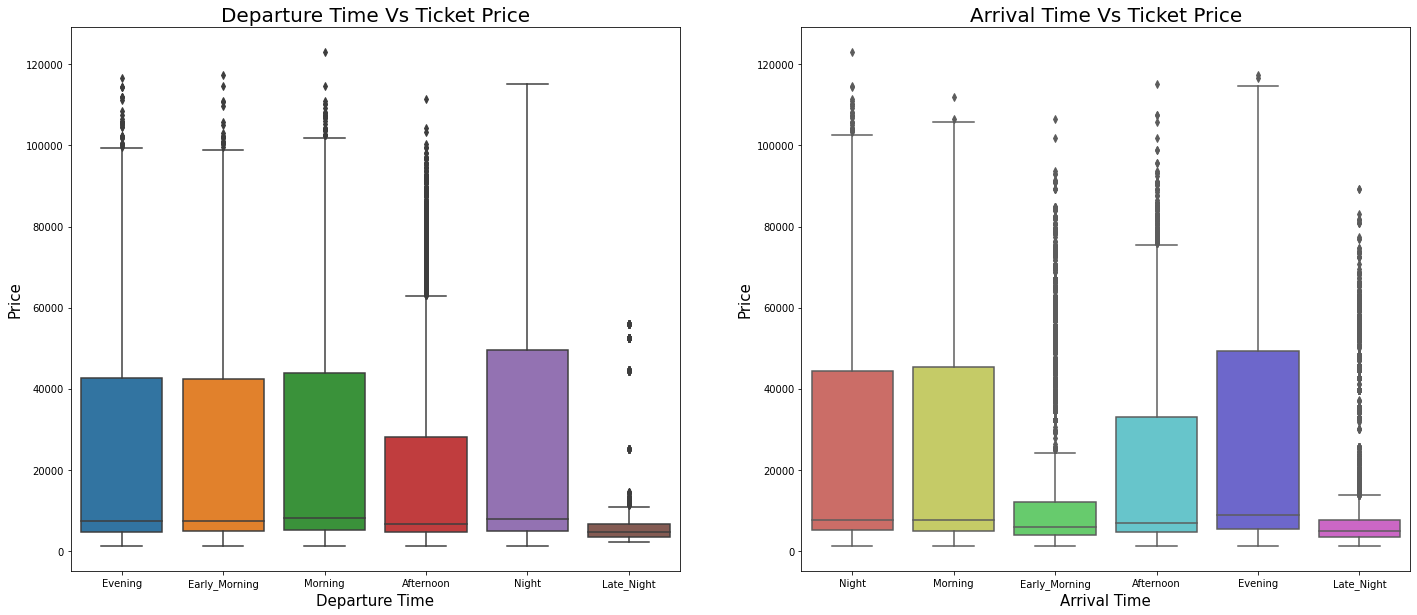

In [22]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time',y='price',data=data)
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time',y='price',data=data,palette='hls')
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

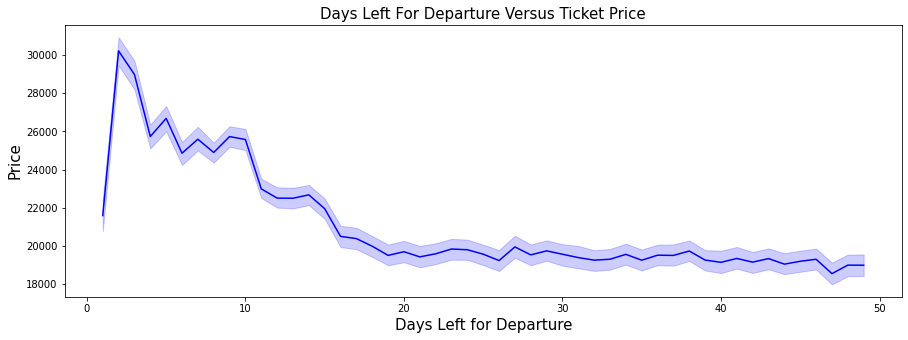

In [23]:
plt.figure(figsize=(15,5))
sns.lineplot(data=data,x='days_left',y='price',color='blue')
plt.title('Days Left For Departure Versus Ticket Price',fontsize=15)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

In [24]:
data.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [25]:
data.duplicated().sum()

0

In [26]:
x=data[data['price']<100000]
x.shape

(300045, 12)

In [27]:
x=data[data['duration']>30]
x.shape

(2226, 12)

In [28]:
data=data[data['price']<100000]
data=data[data['duration']<30]

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297720 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        297720 non-null  int64  
 1   airline           297720 non-null  object 
 2   flight            297720 non-null  object 
 3   source_city       297720 non-null  object 
 4   departure_time    297720 non-null  object 
 5   stops             297720 non-null  object 
 6   arrival_time      297720 non-null  object 
 7   destination_city  297720 non-null  object 
 8   class             297720 non-null  object 
 9   duration          297720 non-null  float64
 10  days_left         297720 non-null  int64  
 11  price             297720 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 29.5+ MB


In [30]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297720 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           297720 non-null  object 
 1   flight            297720 non-null  object 
 2   source_city       297720 non-null  object 
 3   departure_time    297720 non-null  object 
 4   stops             297720 non-null  object 
 5   arrival_time      297720 non-null  object 
 6   destination_city  297720 non-null  object 
 7   class             297720 non-null  object 
 8   duration          297720 non-null  float64
 9   days_left         297720 non-null  int64  
 10  price             297720 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.3+ MB


In [31]:
le=LabelEncoder
airline_le=LabelEncoder()
data['airline']=airline_le.fit_transform(data['airline'])
flight_le=LabelEncoder()
data['flight']=flight_le.fit_transform(data['flight'])
source_city_le=LabelEncoder()
data['source_city']=source_city_le.fit_transform(data['source_city'])
departure_time_le=LabelEncoder()
data['departure_time']=departure_time_le.fit_transform(data['departure_time'])
stops_le=LabelEncoder()
data['stops']=stops_le.fit_transform(data['stops'])
arrival_time_le=LabelEncoder()
data['arrival_time']=arrival_time_le.fit_transform(data['arrival_time'])
destination_city_le=LabelEncoder()
data['destination_city']=destination_city_le.fit_transform(data['destination_city'])
class_le=LabelEncoder()
data['class']=class_le.fit_transform(data['class'])

In [32]:
data.corr()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
airline,1.000000,0.635802,-0.028967,0.057271,-0.030738,0.037378,-0.027150,-0.177537,0.007310,-0.012061,0.242182
flight,0.635802,1.000000,-0.009369,0.072334,-0.120081,0.067260,-0.034049,-0.259440,0.216234,-0.000940,0.305566
source_city,-0.028967,-0.009369,1.000000,-0.006713,0.002564,0.042966,-0.224786,0.001350,0.015501,-0.003799,0.003589
departure_time,0.057271,0.072334,-0.006713,1.000000,-0.007386,-0.045328,-0.002453,-0.053339,0.094472,-0.001649,0.058811
stops,-0.030738,-0.120081,0.002564,-0.007386,1.000000,0.010161,-0.011617,0.099855,-0.494524,-0.006215,-0.203460
arrival_time,0.037378,0.067260,0.042966,-0.045328,0.010161,1.000000,-0.037585,-0.027263,0.012036,-0.004488,0.041850
destination_city,-0.027150,-0.034049,-0.224786,-0.002453,-0.011617,-0.037585,1.000000,0.001077,-0.000370,-0.004968,0.005505
class,-0.177537,-0.259440,0.001350,-0.053339,0.099855,-0.027263,0.001077,1.000000,-0.153553,0.013693,-0.938736
duration,0.007310,0.216234,0.015501,0.094472,-0.494524,0.012036,-0.000370,-0.153553,1.000000,-0.033456,0.215879
days_left,-0.012061,-0.000940,-0.003799,-0.001649,-0.006215,-0.004488,-0.004968,0.013693,-0.033456,1.000000,-0.090955


In [33]:
data.head(100)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
95,5,1448,2,0,0,5,5,1,7.58,1,17610
96,1,839,2,5,0,5,5,1,23.83,1,17295
97,5,1439,2,0,0,2,5,1,5.00,1,17663
98,1,867,2,5,0,5,5,1,26.50,1,18030


In [34]:
x= data.drop(['price'] , axis=1).values
y = data['price'].values

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=20)

In [36]:
x_train.shape

(238176, 10)

In [37]:
x_test.shape

(59544, 10)

In [38]:
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

In [39]:
x_train.shape

(238176, 10)

In [40]:
# Creating a Back up File
data_bk=data.copy()

In [41]:
# storing the Dependent Variables in X and Independent Variable in Y
x1=data.drop(['price'],axis=1)
y1=data['price']

In [42]:
# Splitting the Data into Training set and Testing Set
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.30,random_state=42)
x1_train.shape,x1_test.shape,y1_train.shape,y1_test.shape

((208404, 10), (89316, 10), (208404,), (89316,))

In [43]:
# Scaling the values to convert the int values to Machine Languages
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x1_train=mmscaler.fit_transform(x1_train)
x1_test=mmscaler.fit_transform(x1_test)
x1_train=pd.DataFrame(x1_train)
x1_test=pd.DataFrame(x1_test)  

In [44]:
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Square':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Absolute_Percentage_Error_MAPE':[] ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'R2_score':[]}
Results=pd.DataFrame(a)
Results.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


In [45]:
# Build the Regression / Regressor models

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Create objects of Regression / Regressor models with default hyper-parameters

modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelrfr = RandomForestRegressor()
modelLO=linear_model.Lasso(alpha=0.1)

# Evalution matrix for all the algorithms

MM = [modelmlg, modeldcr, modelrfr, modelLO]

for models in MM:
    
    # Fit the model with train data
    
    models.fit(x1_train, y1_train)
    
    # Predict the model with test data

    y1_pred = models.predict(x1_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # Evaluation metrics for Regression analysis

    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y1_test, y1_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y1_test, y1_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)),3))
    print('R2_score:', round(metrics.r2_score(y1_test, y1_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y1_test, y1_pred))),3))
    
    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y1_test, y1_pred):
        y1_test, y1_pred = np.array(y1_test), np.array(y1_pred)
        return np.mean(np.abs((y1_test - y1_pred) / y1_test)) * 100
    
    # Evaluation of MAPE 

    result = MAPE(y1_test, y1_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')
    
    # Calculate Adjusted R squared values 

    r_squared = round(metrics.r2_score(y1_test, y1_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y1)-1)/(len(y1)-x.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y1_test, y1_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y1_test, y1_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y1_test, y1_pred))),
               'R2_score' : metrics.r2_score(y1_test, y1_pred)}
    Results = Results.append(new_row, ignore_index=True)
    #------------------------------------------------------------

Model Name:  LinearRegression()
Mean Absolute Error (MAE): 4626.561
Mean Squared Error (MSE): 48647508.295
Root Mean Squared Error (RMSE): 6974.777
R2_score: 0.904923
Root Mean Squared Log Error (RMSLE): 8.85
Mean Absolute Percentage Error (MAPE): 43.88 %
Adj R Square:  0.90492
------------------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 899.771
Mean Squared Error (MSE): 8577979.715
Root Mean Squared Error (RMSE): 2928.819
R2_score: 0.983235
Root Mean Squared Log Error (RMSLE): 7.982
Mean Absolute Percentage Error (MAPE): 6.07 %
Adj R Square:  0.983234
------------------------------------------------------------------------------------------------------------
Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 874.581
Mean Squared Error (MSE): 5277396.367
Root Mean Squared Error (RMSE): 2297.258
R2_score: 0.989686
Root Mean Squared Log Error (RMSLE): 7.739
Mean Ab

In [46]:
Results

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,LinearRegression(),4626.561270,0.904920,6974.776577,43.875265,4.864751e+07,8.850056,0.904923
1,DecisionTreeRegressor(),899.771375,0.983234,2928.818826,6.065602,8.577980e+06,7.982354,0.983235
2,"(DecisionTreeRegressor(max_features='auto', ra...",874.580616,0.989686,2297.258446,5.904421,5.277396e+06,7.739472,0.989686
3,Lasso(alpha=0.1),4626.457567,0.904920,6974.778711,43.872276,4.864754e+07,8.850056,0.904923


In [47]:
models=['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','Lasso Regression']
result=pd.DataFrame({'Model_Name':models})
result['Adj_R_Square']=Results['Adj_R_Square']
result['Mean_Absolute_Error_MAE']=Results['Mean_Absolute_Error_MAE']
result['Root_Mean_Squared_Error_RMSE']=Results['Root_Mean_Squared_Error_RMSE']
result['Mean_Absolute_Percentage_Error_MAPE']=Results['Mean_Absolute_Percentage_Error_MAPE']
result['Mean_Squared_Error_MSE']=Results['Mean_Squared_Error_MSE']
result['Root_Mean_Squared_Log_Error_RMSLE']=Results['Root_Mean_Squared_Log_Error_RMSLE']
result['R2_score']=Results['R2_score']
result=result.sort_values(by='Adj_R_Square',ascending=False).reset_index(drop=True)
result

,Model_Name,Adj_R_Square,Mean_Absolute_Error_MAE,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,RandomForestRegressor,0.989686,874.580616,2297.258446,5.904421,5.277396e+06,7.739472,0.989686
1,DecisionTreeRegressor,0.983234,899.771375,2928.818826,6.065602,8.577980e+06,7.982354,0.983235
2,LinearRegression,0.904920,4626.561270,6974.776577,43.875265,4.864751e+07,8.850056,0.904923
3,Lasso Regression,0.904920,4626.457567,6974.778711,43.872276,4.864754e+07,8.850056,0.904923


In [48]:
#Trainig the model with
modelrfr.fit(x1_train, y1_train)
    
# Predict the model with test data

y1_pred = modelrfr.predict(x1_test)

In [49]:
out1=pd.DataFrame({'Price_actual':y1_test,'Price_pred':y1_pred})
result1=data_bk.merge(out1,left_index=True,right_index=True)

In [50]:
result1.sample(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Price_actual,Price_pred
8000,1,759,2,2,0,2,5,1,24.83,40,3855,3855,4366.61
282594,5,1515,3,5,0,2,0,0,20.42,42,63277,63277,62159.25
218420,5,1546,2,2,0,2,4,0,26.17,39,67769,67769,67928.04
198810,3,404,1,0,0,5,4,1,6.17,13,5042,5042,6053.76
124735,3,380,4,0,0,2,2,1,6.00,33,5699,5699,4804.09
175024,3,205,3,2,0,5,4,1,5.50,39,3223,3223,3249.82
170150,0,1177,3,1,0,2,0,1,9.67,45,2623,2623,2623.00
228543,5,1537,5,2,2,5,2,0,2.17,36,36700,36700,38926.68
173081,2,1059,3,1,0,2,4,1,12.75,23,5067,5067,5082.75
132289,3,13,4,1,2,4,5,1,3.17,31,4914,4914,4755.07


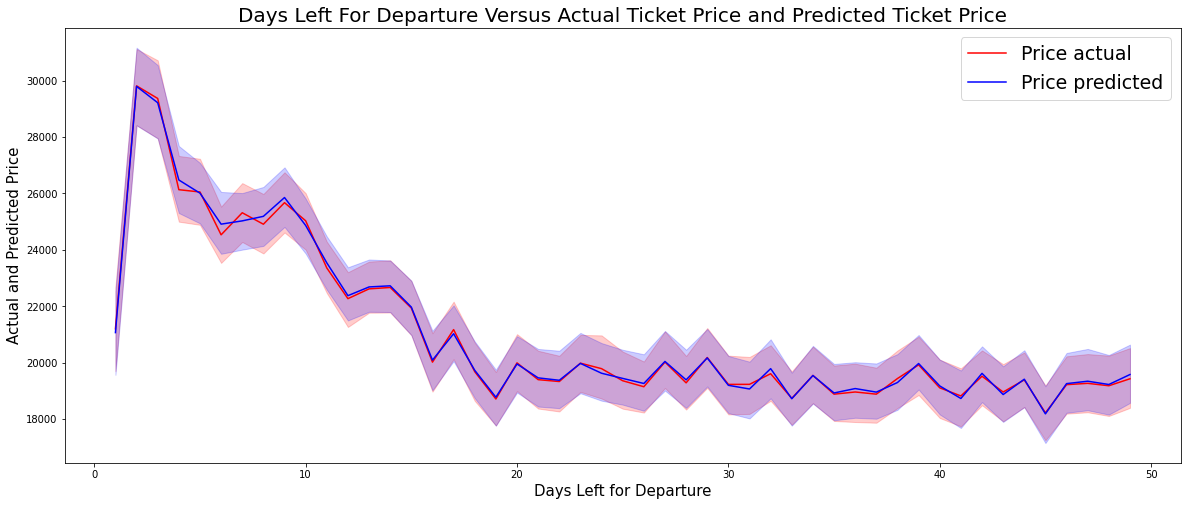

In [51]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result1,x='days_left',y='Price_actual',color='red')
sns.lineplot(data=result1,x='days_left',y='Price_pred',color='blue')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['Price actual','Price predicted'],fontsize=19)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()

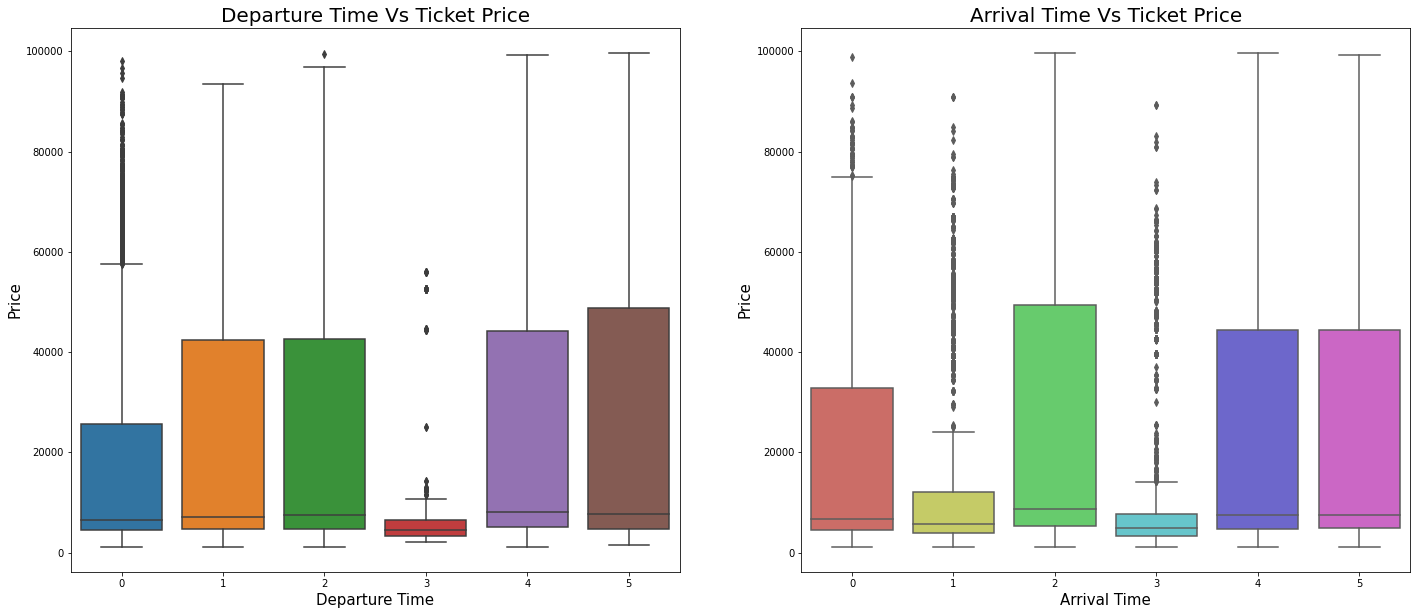

In [52]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time',y='price',data=result1)
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time',y='price',data=result1,palette='hls')
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

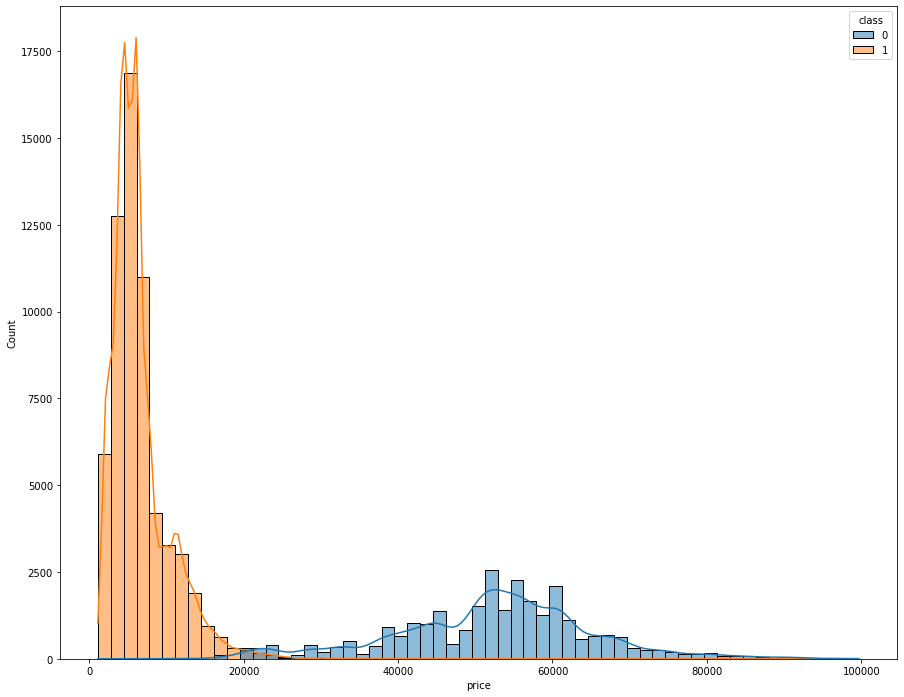

In [53]:
plt.figure(figsize=(15,12))
sns.histplot(result1, x="price", kde=True,hue='class')

Linear regression

In [54]:
reg = linear_model.LinearRegression()

In [55]:
reg.fit(x_train , y_train)

LinearRegression()

In [56]:
train_score_reg=reg.score(x_train,y_train)
test_score_reg=reg.score(x_test,y_test)
reg.coef_

array([  3573.87834132,    218.34120059,    319.61093769,    128.58930694,
        -3384.43955818,    568.72407177,    362.3188637 , -44473.06513009,
          665.85935604,  -2979.81695343])

In [57]:
pd.DataFrame(reg.coef_ , data.columns[:-1] , columns=['Coeficient'])

,Coeficient
airline,3573.878341
flight,218.341201
source_city,319.610938
departure_time,128.589307
stops,-3384.439558
arrival_time,568.724072
destination_city,362.318864
class,-44473.065130
duration,665.859356
days_left,-2979.816953


In [58]:
Y_pred = reg.predict(x_test)
data1 = pd.DataFrame({"Y_test" : y_test , "Y_pred": Y_pred})
data1.head(10)

,Y_test,Y_pred
0,2278,-375.029773
1,5402,3535.206826
2,49725,50943.673502
3,24056,45288.111446
4,55983,55029.364172
5,3000,-2096.355029
6,4697,7070.864995
7,6133,7104.080404
8,4202,3037.140147
9,6067,7641.027051


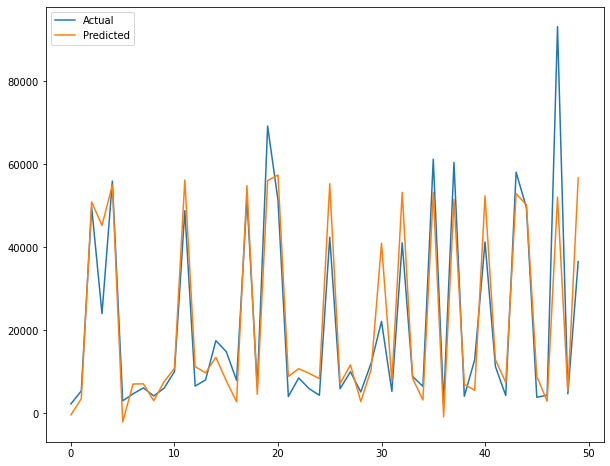

In [59]:
plt.figure(figsize=(10,8))
plt.plot(data1[:50])
plt.legend(["Actual" , "Predicted"])

In [60]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
import statsmodels.api as sm

In [61]:
y_pred_reg=reg.predict(x_test)
lin_score_reg = r2_score(y_test , y_pred_reg)
lin_score_reg

0.9051917413403039

In [62]:
p = len(x_train[0])
n = len(y_train)
adj_R2_reg = 1-(1-lin_score_reg)*(n-1)/(n-p-1)
adj_R2_reg

0.9051877605598089

In [63]:
lin_score_reg>adj_R2_reg

True

In [64]:
lin_mape_reg= mean_absolute_percentage_error(y_test,y_pred_reg)
lin_mape_reg

0.4385560362249626

In [65]:
mae_reg=mean_absolute_error(y_test,y_pred_reg)
mae_reg

4647.79987215375

In [66]:
mse_reg=mean_squared_error(y_test,y_pred_reg)
mse_reg

48924158.69168562

In [67]:
rmse_reg=mse_reg**0.5
rmse_reg

6994.580665893104

Lasso regression

In [68]:
las = linear_model.Lasso(alpha=0.7)
las.fit(x_train, y_train)

Lasso(alpha=0.7)

In [69]:
train_score_las=las.score(x_train,y_train)

In [70]:
test_score_las=las.score(x_test,y_test)

In [71]:
intercept_las=las.intercept_

In [72]:
y_pred =las.predict(x_test)
data2 = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
data2.head(10)

,Y_test,Y_pred
0,2278,-374.848302
1,5402,3541.304370
2,49725,50941.874212
3,24056,45286.046388
4,55983,55023.227200
5,3000,-2094.643063
6,4697,7074.594895
7,6133,7107.203107
8,4202,3036.210070
9,6067,7640.305426


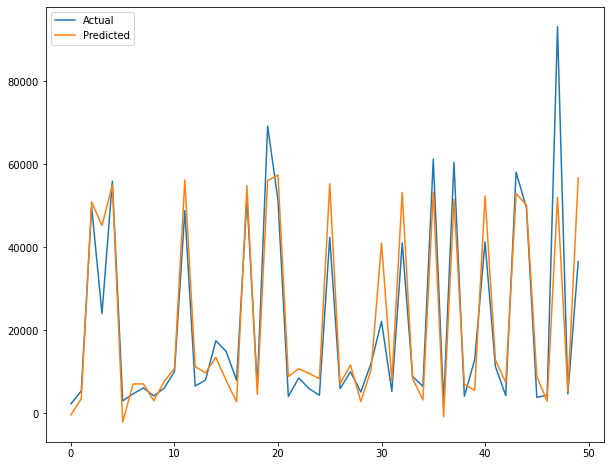

In [73]:
plt.figure(figsize=(10,8))
plt.plot(data2[:50])
plt.legend(["Actual" , "Predicted"])

In [74]:
y_pred_las=las.predict(x_test)

In [75]:
lin_score_las = r2_score(y_test , y_pred_las)
lin_score_las

0.9051910997459934

In [76]:
adj_R2_las = 1-(1-lin_score_las)*(n-1)/(n-p-1)
adj_R2_las

0.9051871189385593

In [77]:
lin_score_las>adj_R2_las

True

In [78]:
lin_mape_las= mean_absolute_percentage_error(y_test,y_pred_las)
lin_mape_las

0.43844758522119437

In [79]:
mae_las=mean_absolute_error(y_test,y_pred_las)
mae_las

4647.432576280341

In [80]:
mse_las=mean_squared_error(y_test,y_pred_las)
mse_las

48924489.77530964

In [81]:
rmse_las=mse_las**0.5
rmse_las

6994.6043330062375

Decision Tree Model

In [82]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_features=10,max_depth=7,random_state=42)
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=7, max_features=10, random_state=42)

In [83]:
train_score_dt=dt.score(x_train,y_train)

In [84]:
test_score_dt=dt.score(x_test ,y_test)

In [85]:
y_pred =dt.predict(x_test)
data2 = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
data2.head(10)

,Y_test,Y_pred
0,2278,3008.250332
1,5402,6050.993118
2,49725,48425.144941
3,24056,26776.889143
4,55983,60777.733367
5,3000,2550.634951
6,4697,5485.276010
7,6133,4922.398639
8,4202,4562.384835
9,6067,6050.993118


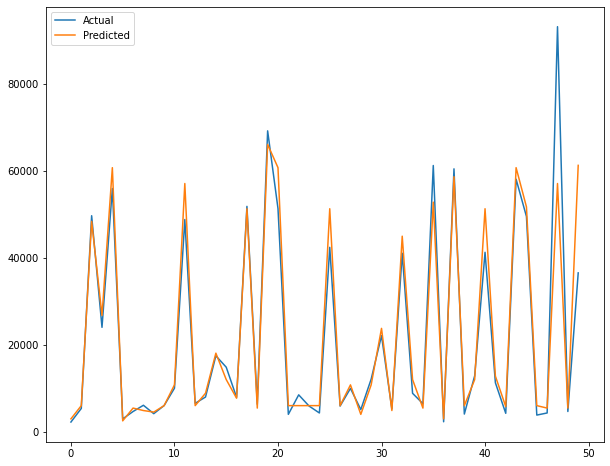

In [86]:
plt.figure(figsize=(10,8))
plt.plot(data2[:50])
plt.legend(["Actual" , "Predicted"])

In [87]:
y_pred_dt=dt.predict(x_test)

In [88]:
lin_score_dt = r2_score(y_test , y_pred_dt)
lin_score_dt

0.9538148039180072

In [89]:
adj_R2_dt = 1-(1-lin_score_dt)*(n-1)/(n-p-1)
adj_R2_dt

0.9538128647079603

In [90]:
lin_score_dt>adj_R2_dt

True

In [91]:
lin_mape_dt= mean_absolute_percentage_error(y_test,y_pred_dt)
lin_mape_dt

0.1939500928067273

In [92]:
mae_dt=mean_absolute_error(y_test,y_pred_dt)
mae_dt

2830.426439542751

In [93]:
mse_dt=mean_squared_error(y_test,y_pred_dt)
mse_dt

23833069.96948991

In [94]:
rmse_dt=mse_dt**0.5
rmse_dt

4881.9125319376535

Random Forest Model

In [95]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(max_depth=7,max_features=10,random_state=42)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=7, max_features=10, random_state=42)

In [96]:
train_score_rf=rf.score(x_train,y_train)

In [97]:
test_score_rf=rf.score(x_test,y_test)

In [98]:
y_pred =rf.predict(x_test)
data2 = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
data2.head(10)

,Y_test,Y_pred
0,2278,2994.647110
1,5402,6023.915230
2,49725,48714.461760
3,24056,26789.171200
4,55983,60601.140935
5,3000,2647.433598
6,4697,5486.636727
7,6133,5084.560712
8,4202,4375.243663
9,6067,6052.137962


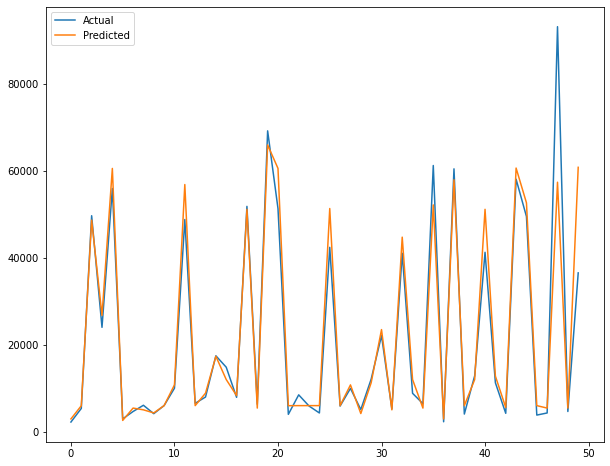

In [99]:
plt.figure(figsize=(10,8))
plt.plot(data2[:50])
plt.legend(["Actual" , "Predicted"])

In [100]:
y_pred_rf=rf.predict(x_test)

In [101]:
lin_score_rf = r2_score(y_test , y_pred_rf)
lin_score_rf

0.955064838399264

In [102]:
adj_R2_rf = 1-(1-lin_score_rf)*(n-1)/(n-p-1)
adj_R2_rf

0.955062951675287

In [103]:
lin_score_rf>adj_R2_rf

True

In [104]:
lin_mape_rf= mean_absolute_percentage_error(y_test,y_pred_rf)
lin_mape_rf

0.1918953981163066

In [105]:
mae_rf=mean_absolute_error(y_test,y_pred_rf)
mae_rf

2789.196381088163

In [106]:
mse_rf=mean_squared_error(y_test,y_pred_rf)
mse_rf

23188011.340677783

In [107]:
rmse_rf=mse_rf**0.5
rmse_rf

4815.393165742314